In [1]:
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import json
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

from data_viz.utils import filter_string, create_amsterdam_heatmap

# Extract

# Specify the path to your zip file
import zipfile

def extract(zip_file_path, extract_destination):
    # Specify the destination directory where you want to extract the contents

    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all contents to the destination directory
        zip_ref.extractall(extract_destination)

    print(f"Contents extracted to {extract_destination}")

zip_file_paths = ['data/geo/amsterdam_areas.zip', 'data/geo/post_codes.zip']
for zip_file_path in zip_file_paths:
    
    extract(zip_file_path, extract_destination="data/geo")

zip_file_paths = ['data/airbnb.zip', 'rentals.json']
for zip_file_path in zip_file_paths:
    extract(zip_file_path, extract_destination="data/geo")

In [4]:
airbnb = pd.read_csv("data/airbnb.csv")

json_file_path = 'data/rentals.json'
with open(json_file_path, 'r') as file:
    rentals = json.load(file)
rentals = pd.DataFrame(rentals)

geojson_path = 'data/geo/post_codes.geojson'
amsterdam_postcode_map = gpd.read_file(geojson_path)


In [5]:
# # clean vars
# rentals["_id"] = rentals["_id"].apply(lambda x: x[0])
# rentals["crawledAt"] = rentals["crawledAt"].apply(lambda x: x[0])
# rentals["detailsCrawledAt"] = rentals["detailsCrawledAt"].apply(lambda x: x[0])

# filter out missing data (-40% of dataset)
airbnb = airbnb.dropna(axis=0)

# add vars
airbnb["pc4_code"] = airbnb.zipcode.apply(lambda x: filter_string(x))
# airbnb['coordinates'] = list(zip(airbnb['latitude'], airbnb['longitude']))
airbnb["price_per_bedroom"] = airbnb["price"] / airbnb["bedrooms"]
airbnb["price_per_accommodates"] = airbnb["price"] / airbnb["accommodates"]

# extract room types
room_types = airbnb.room_type.unique()


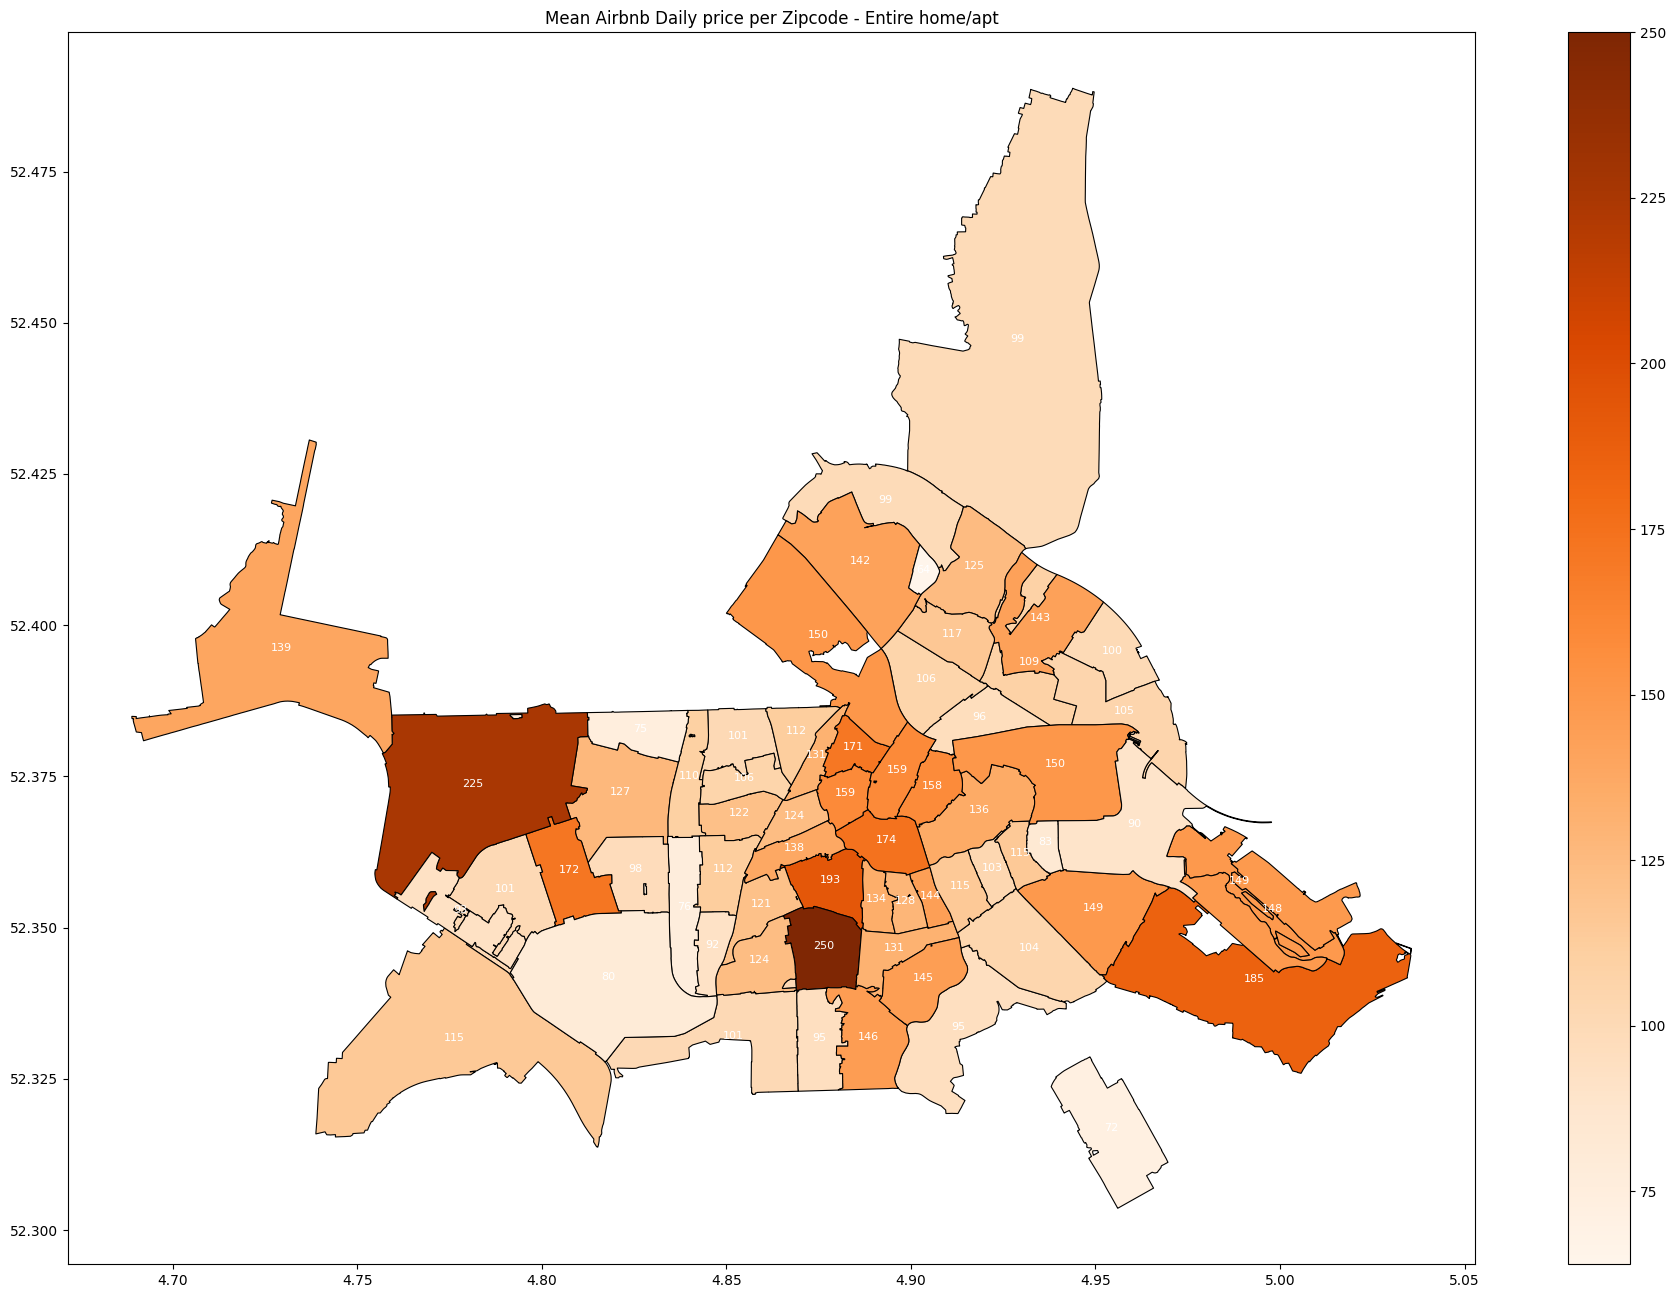

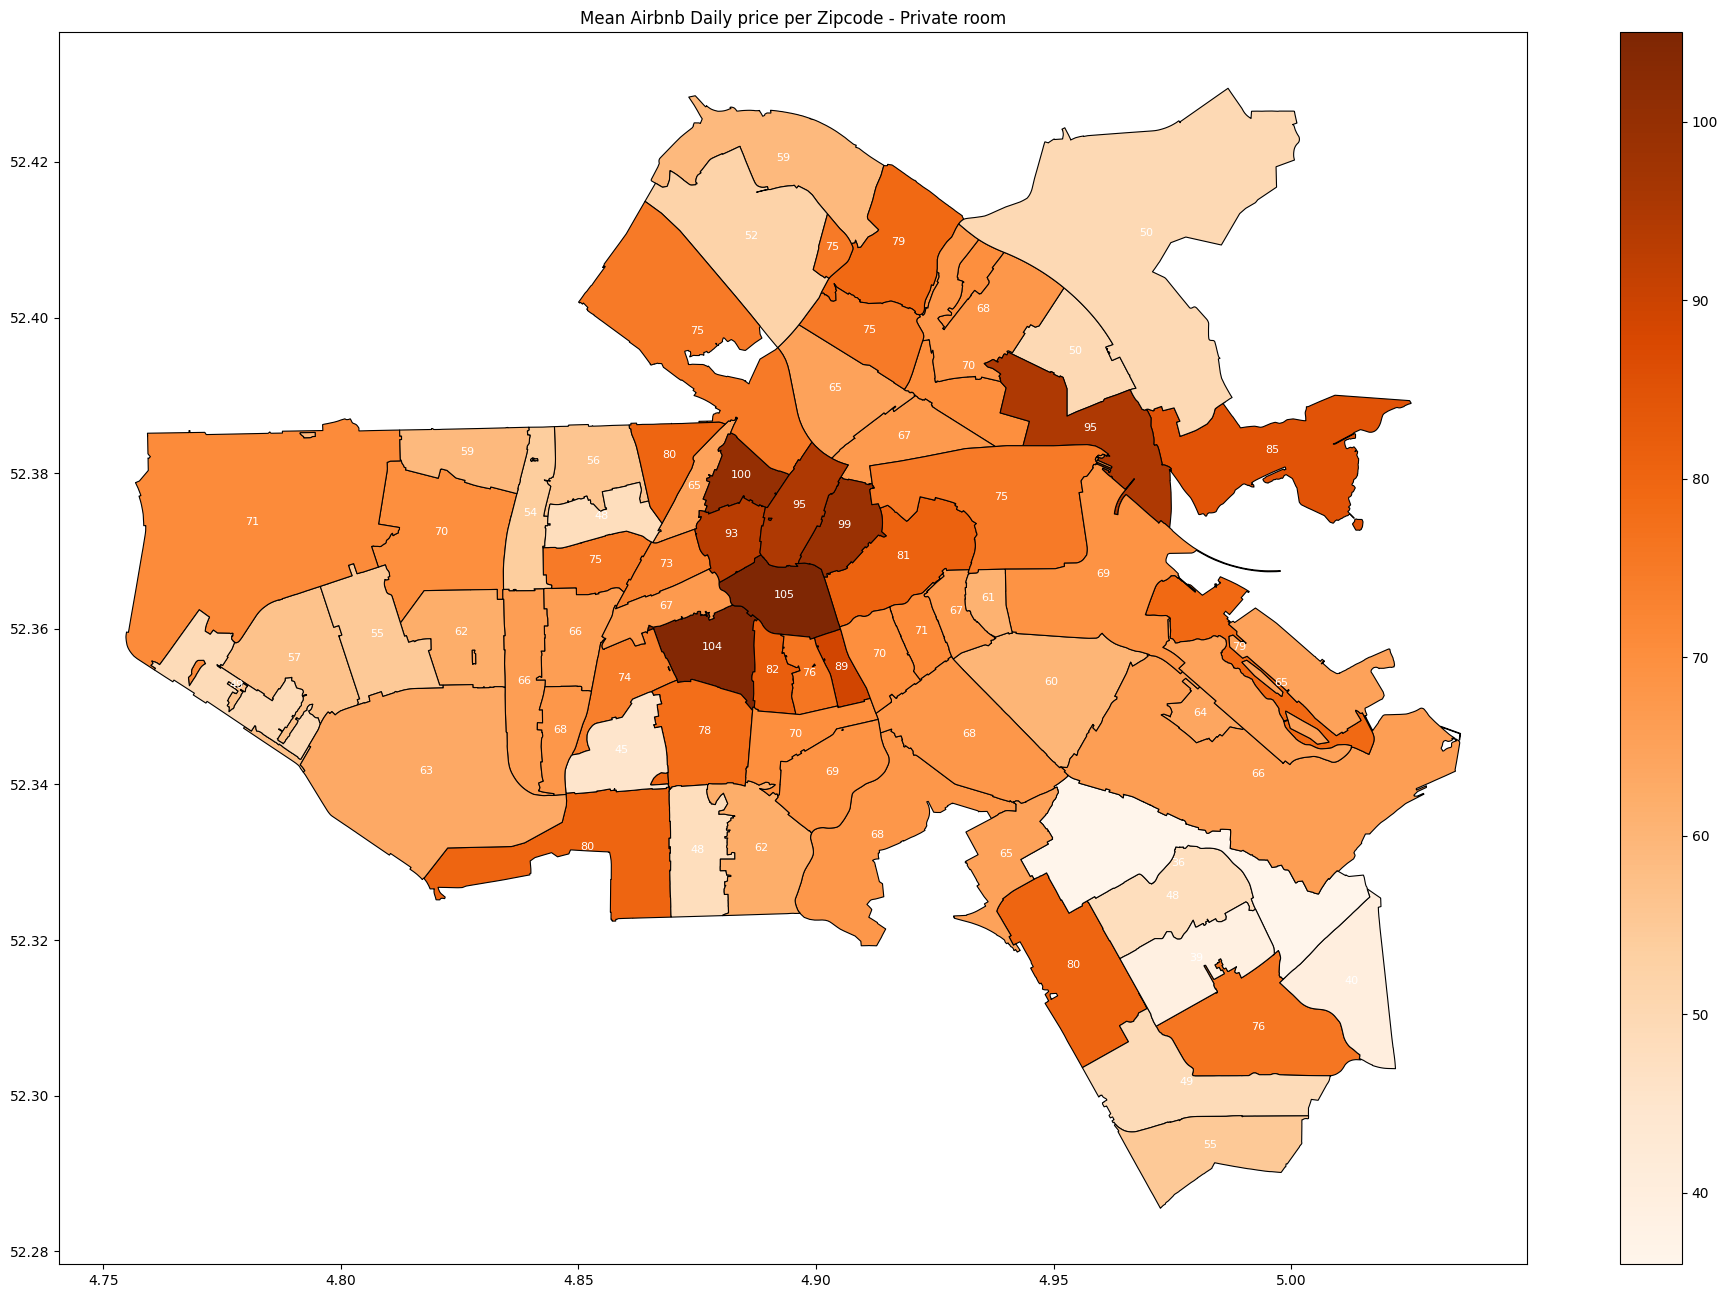

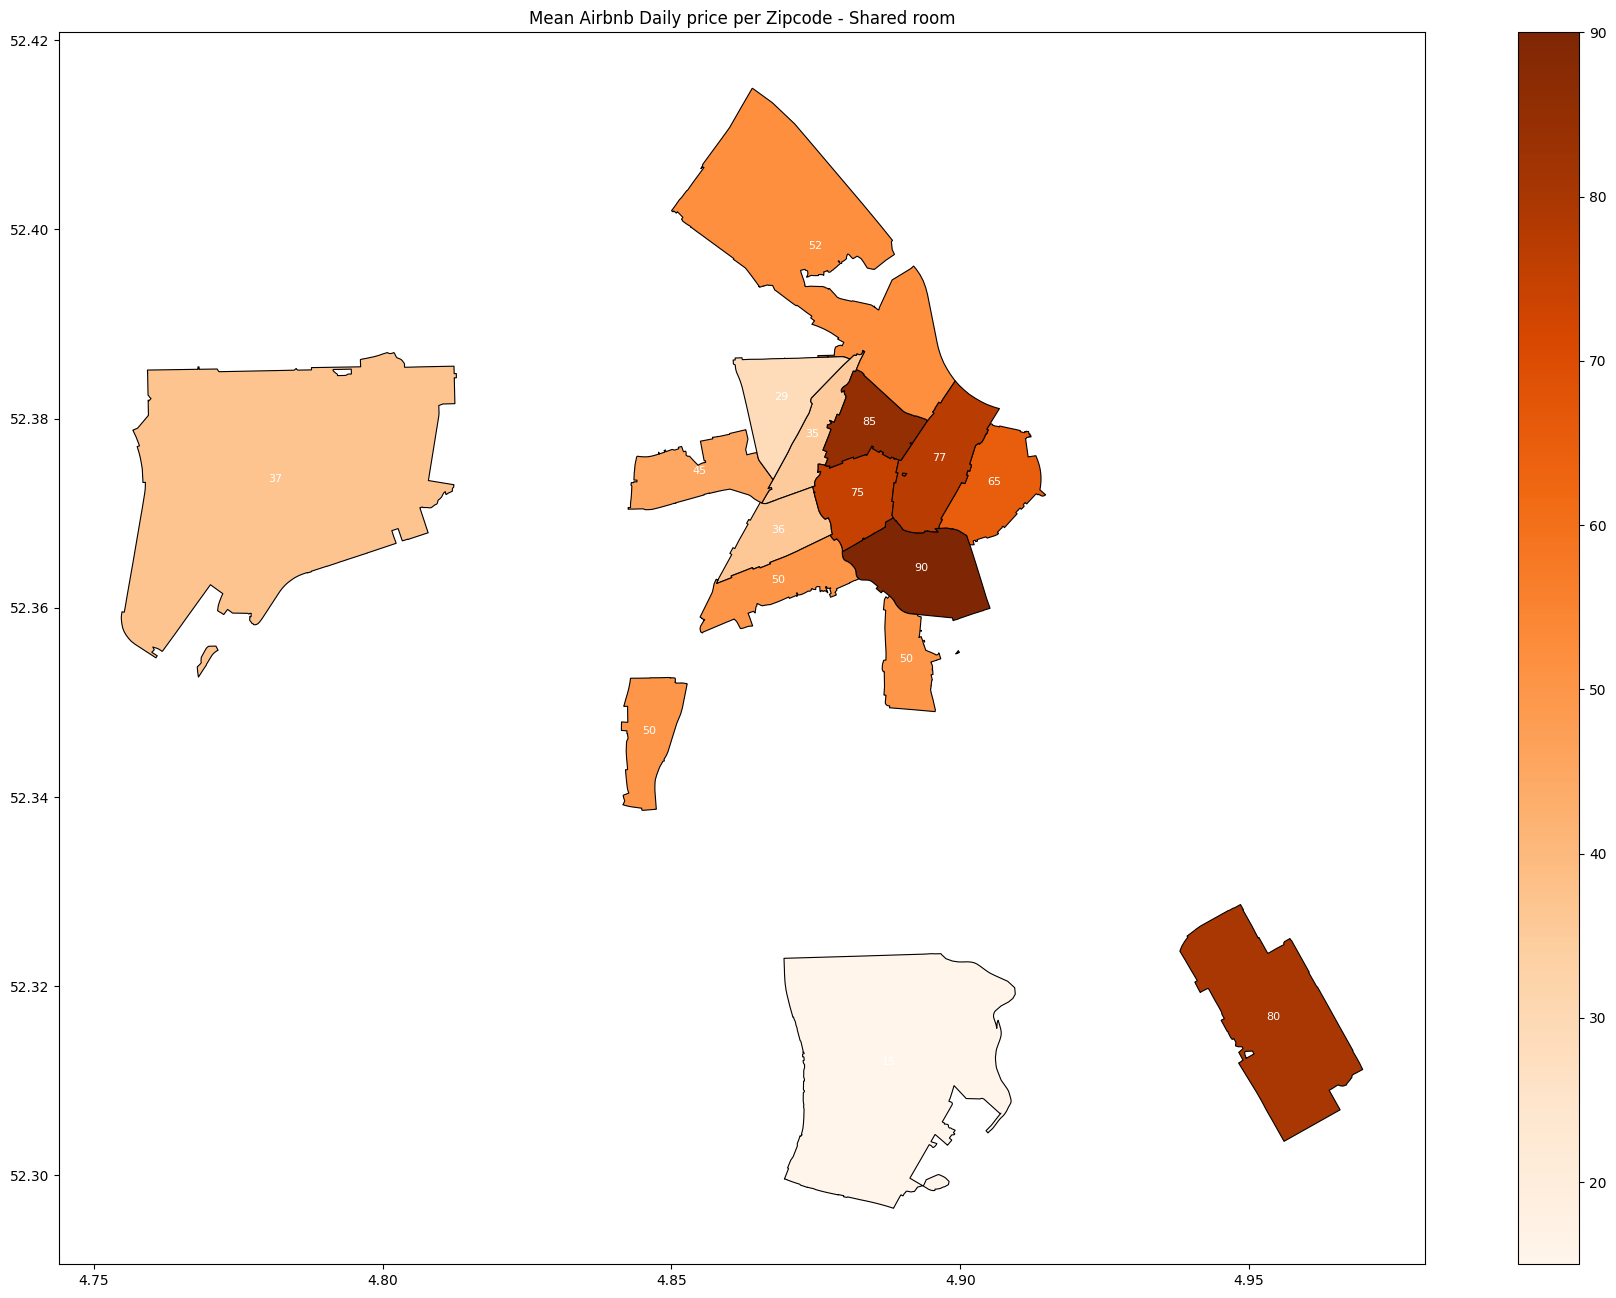

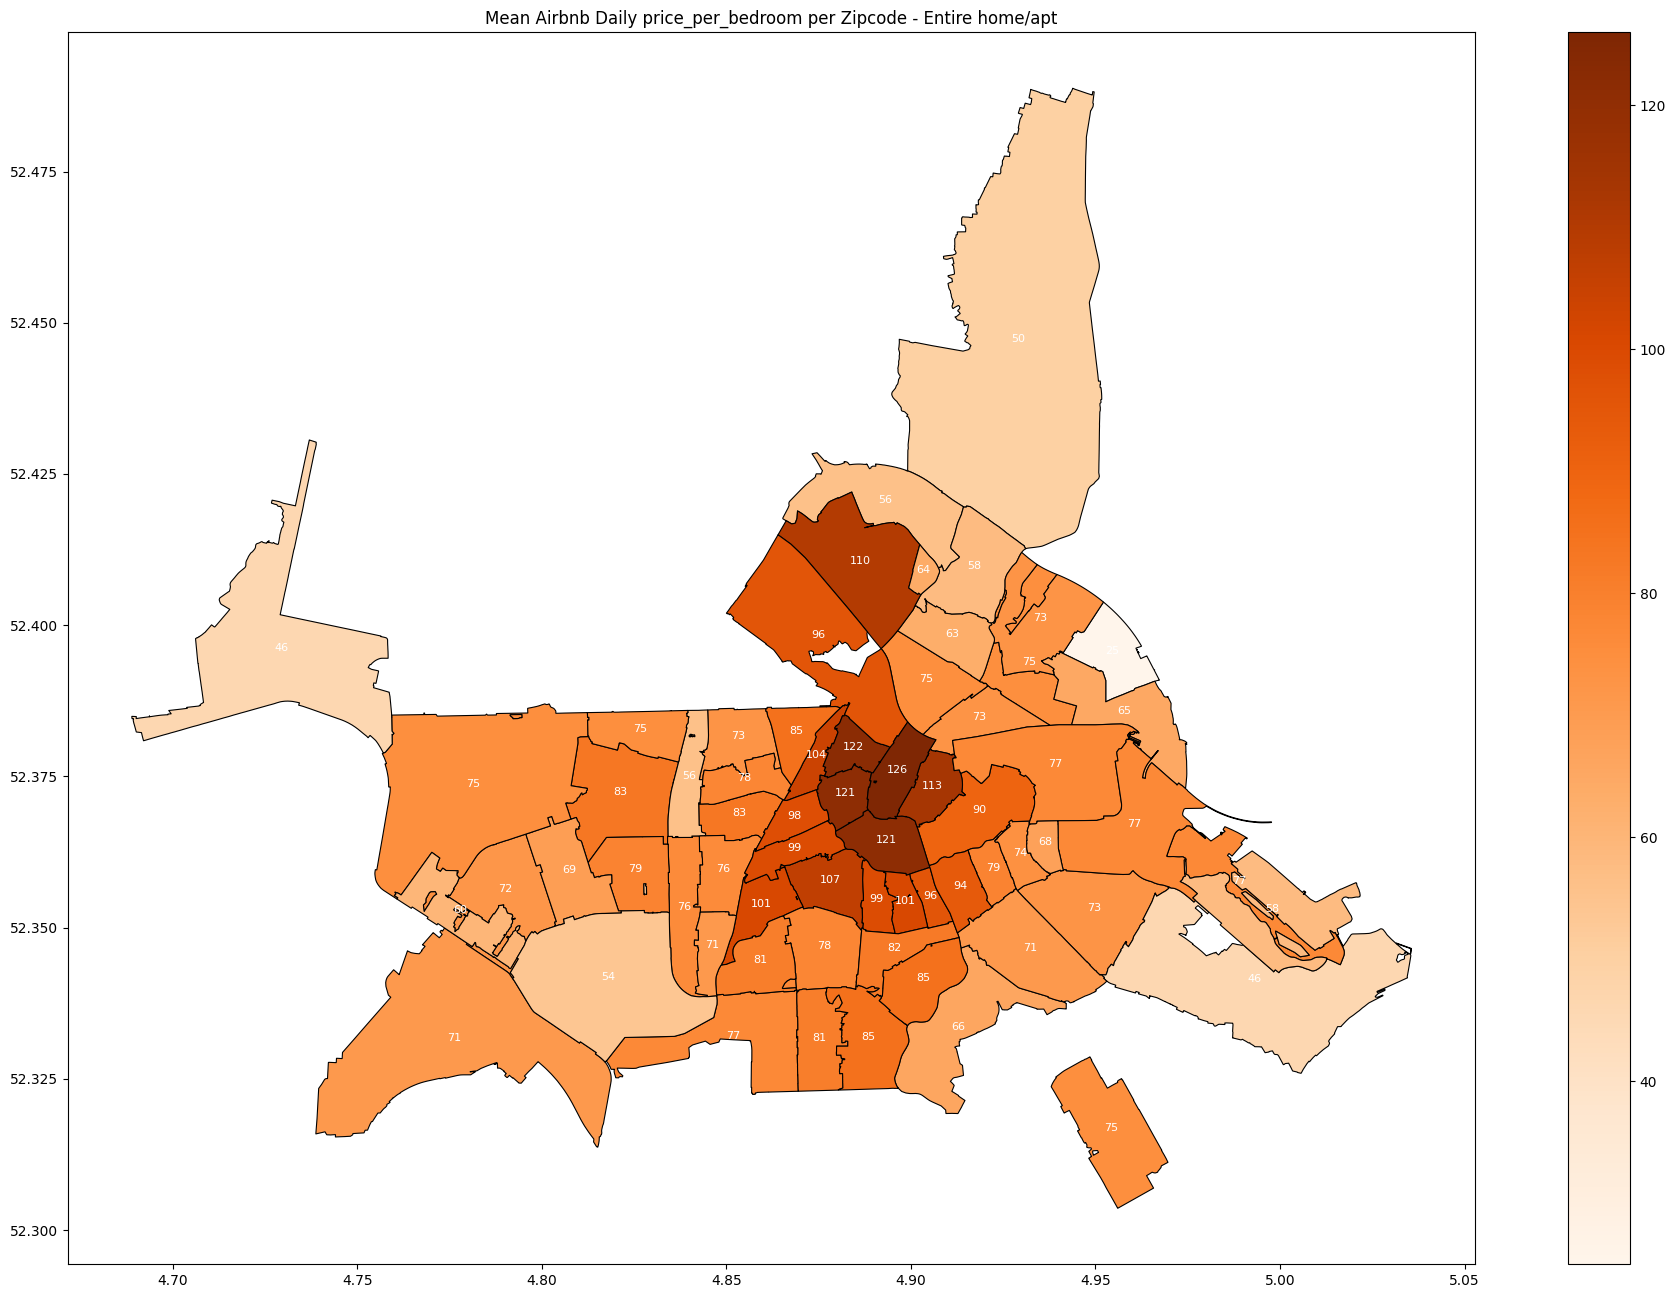

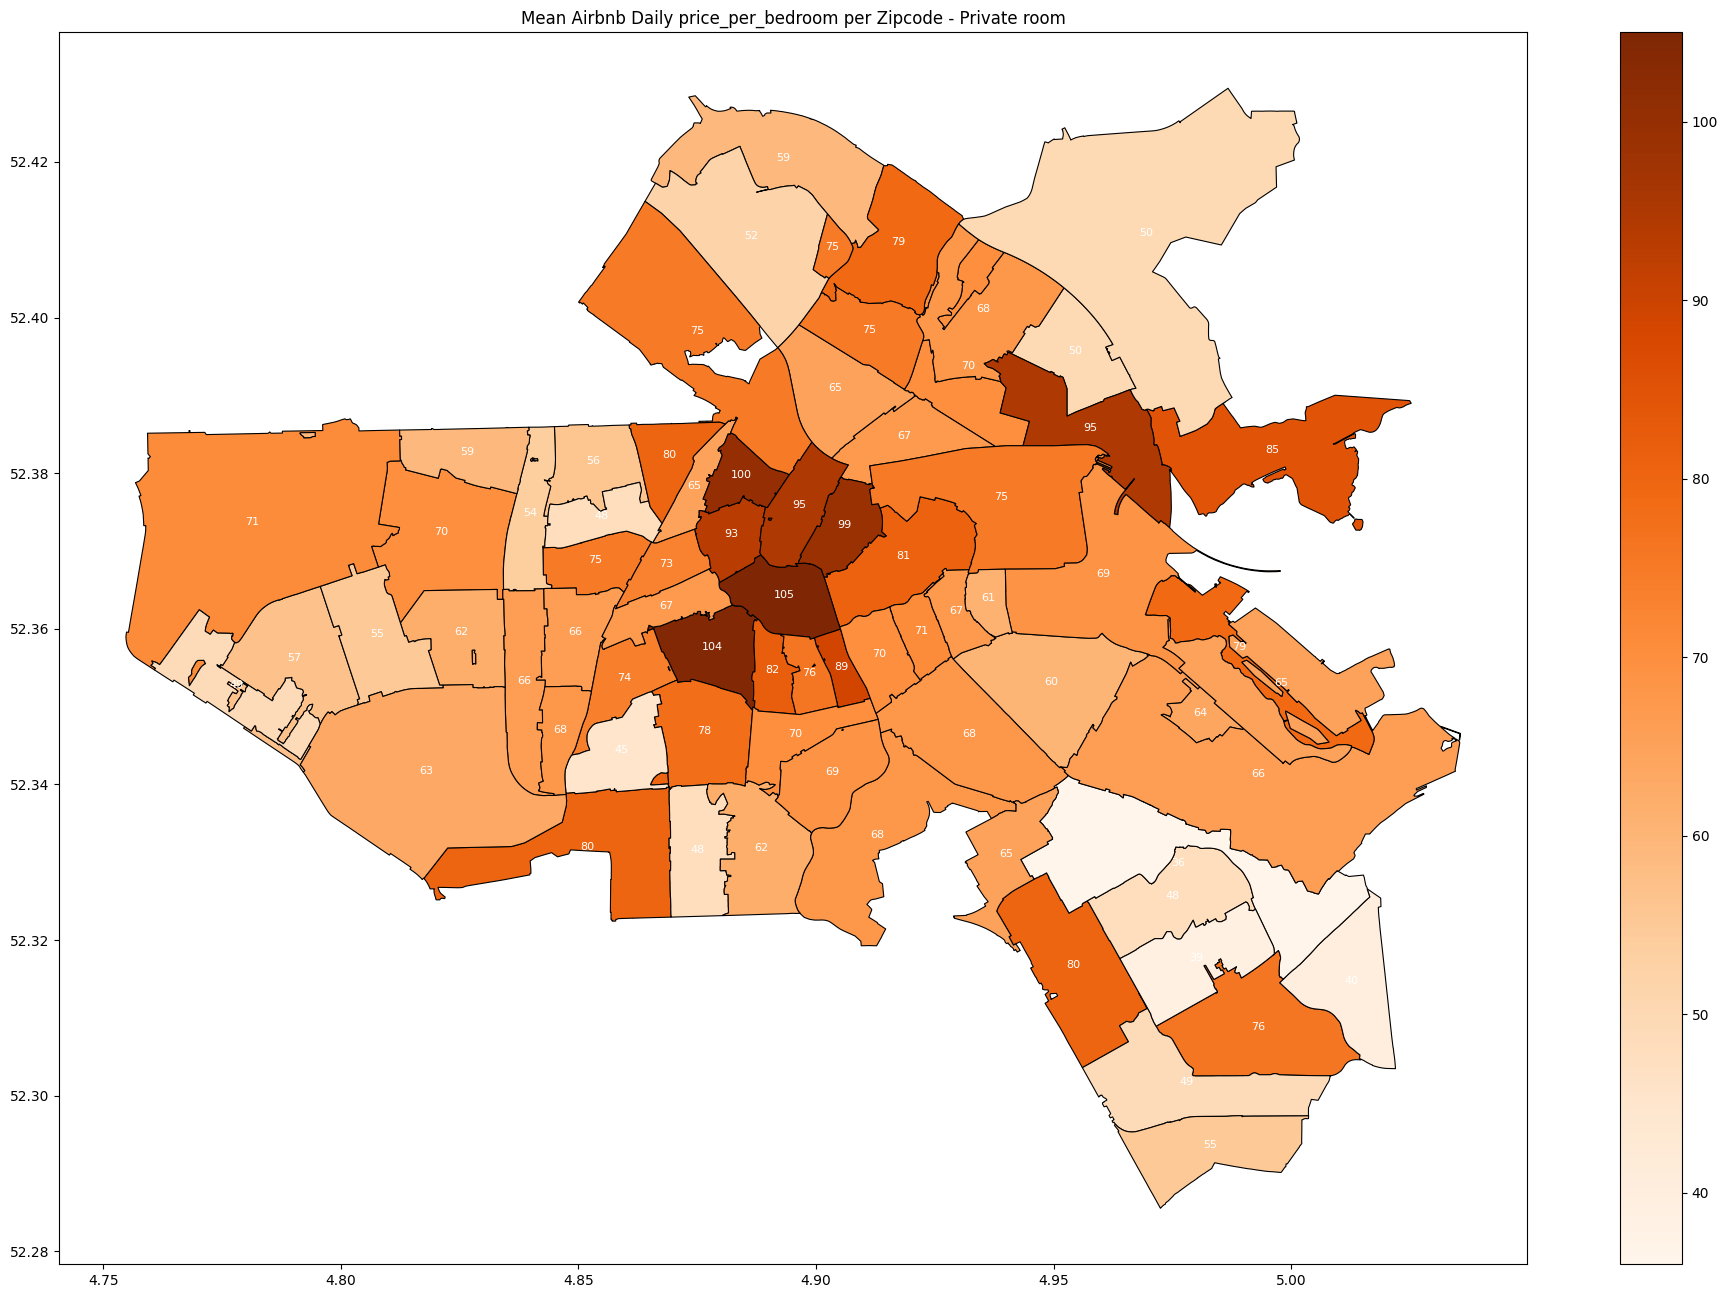

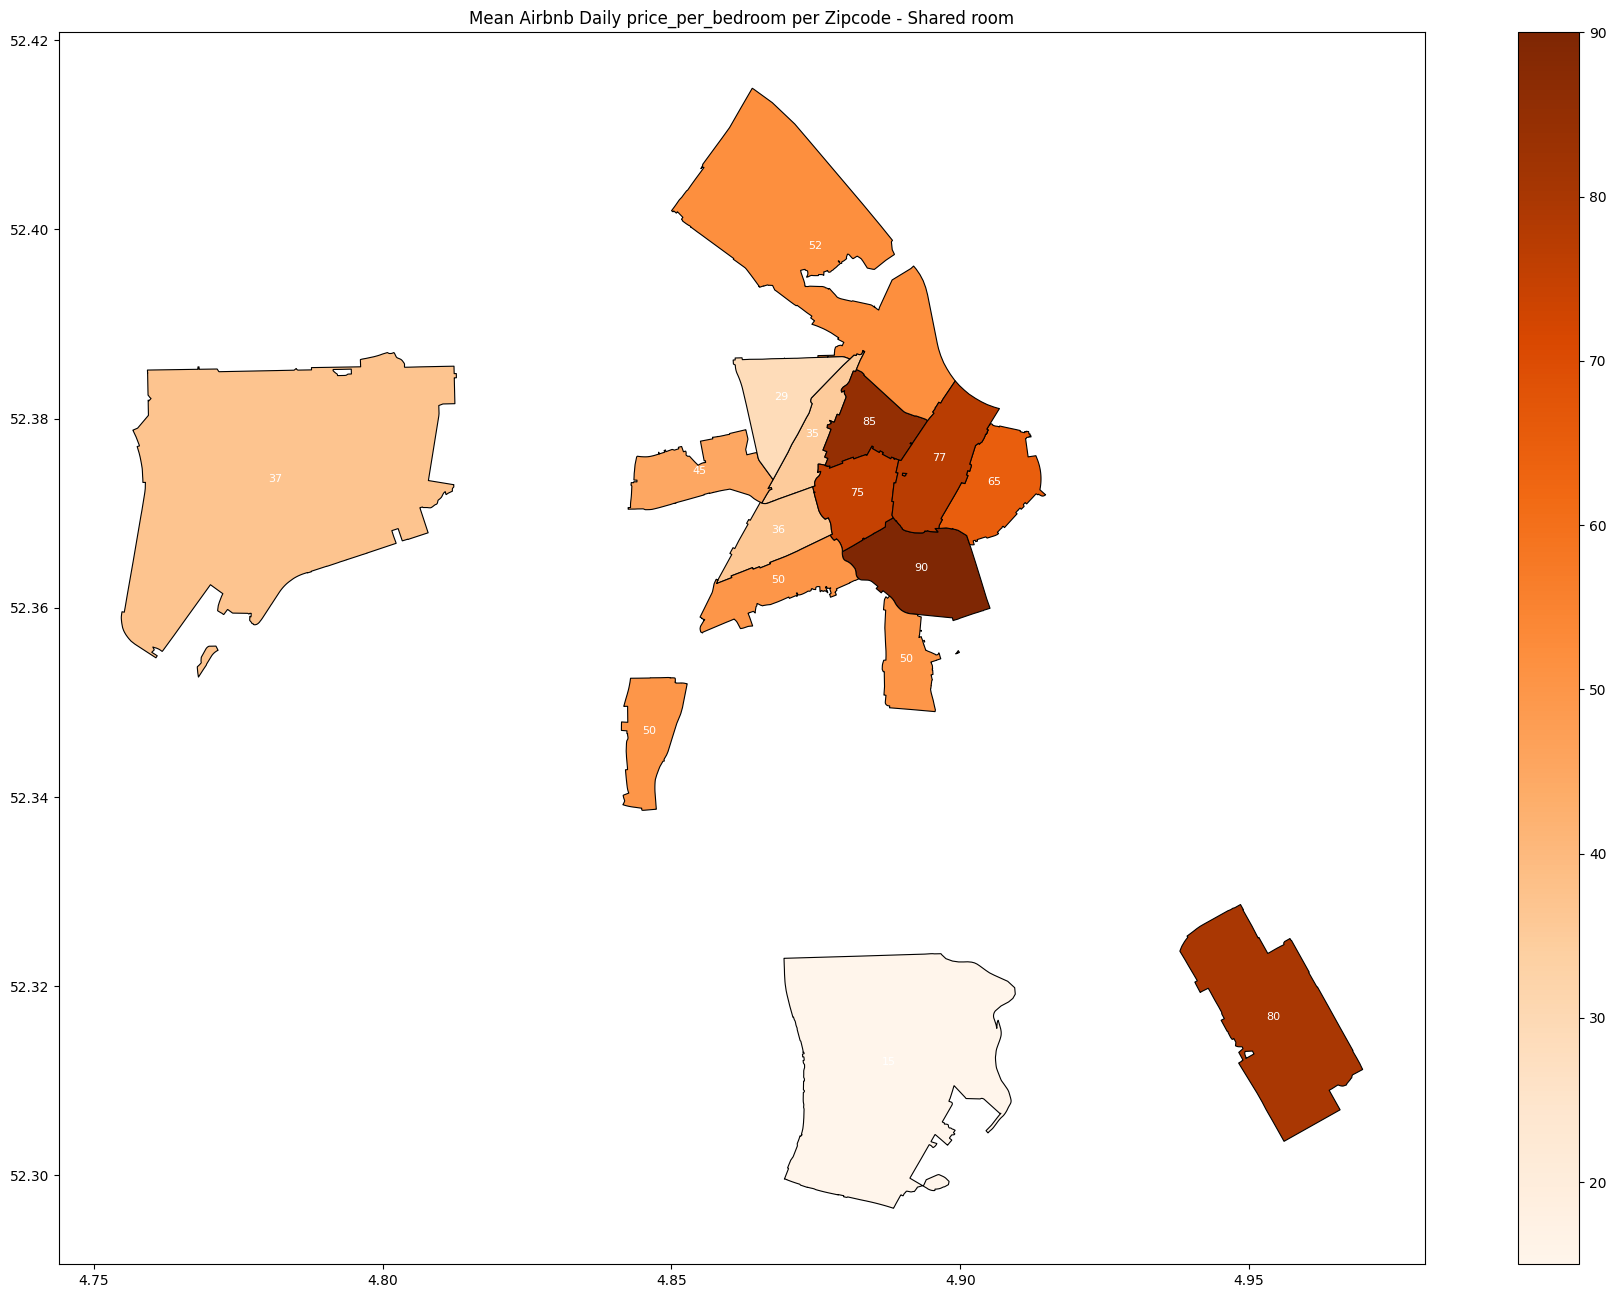

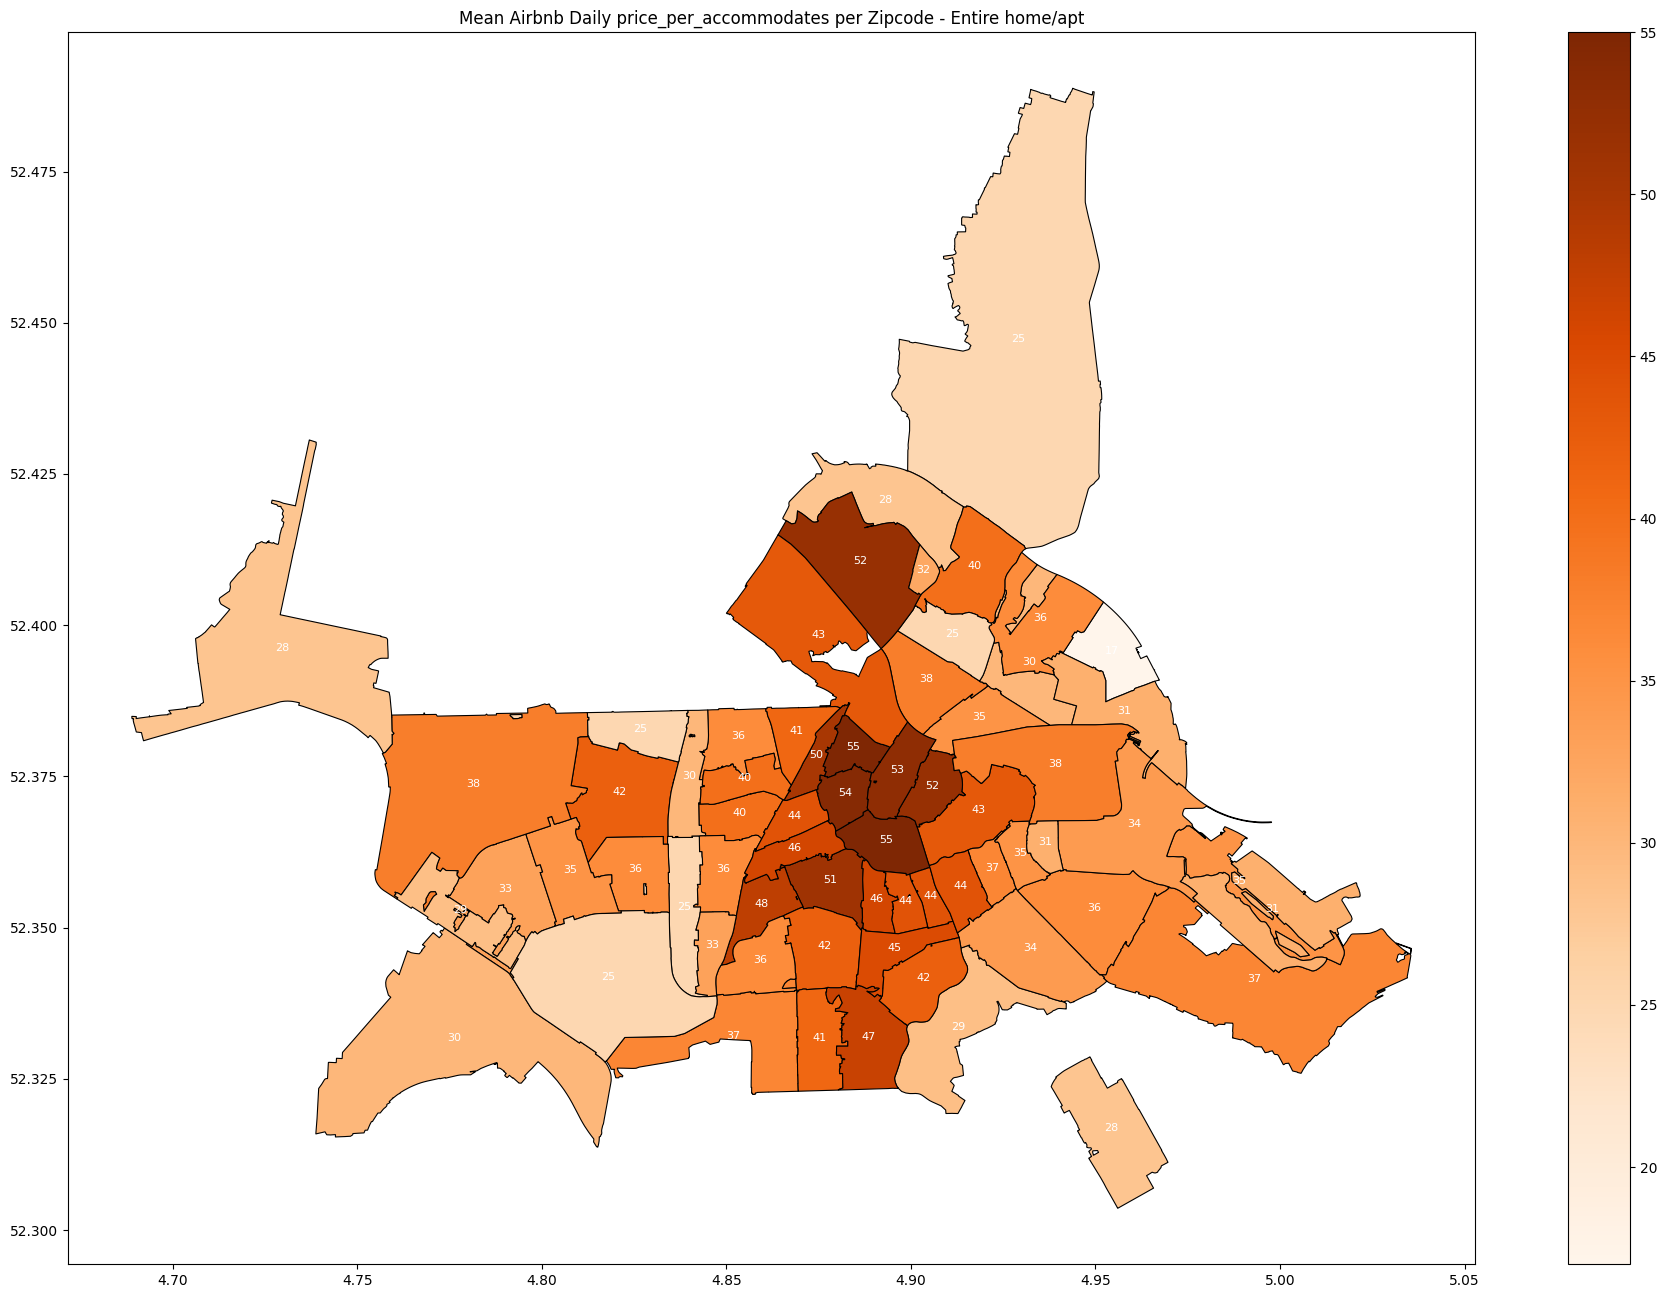

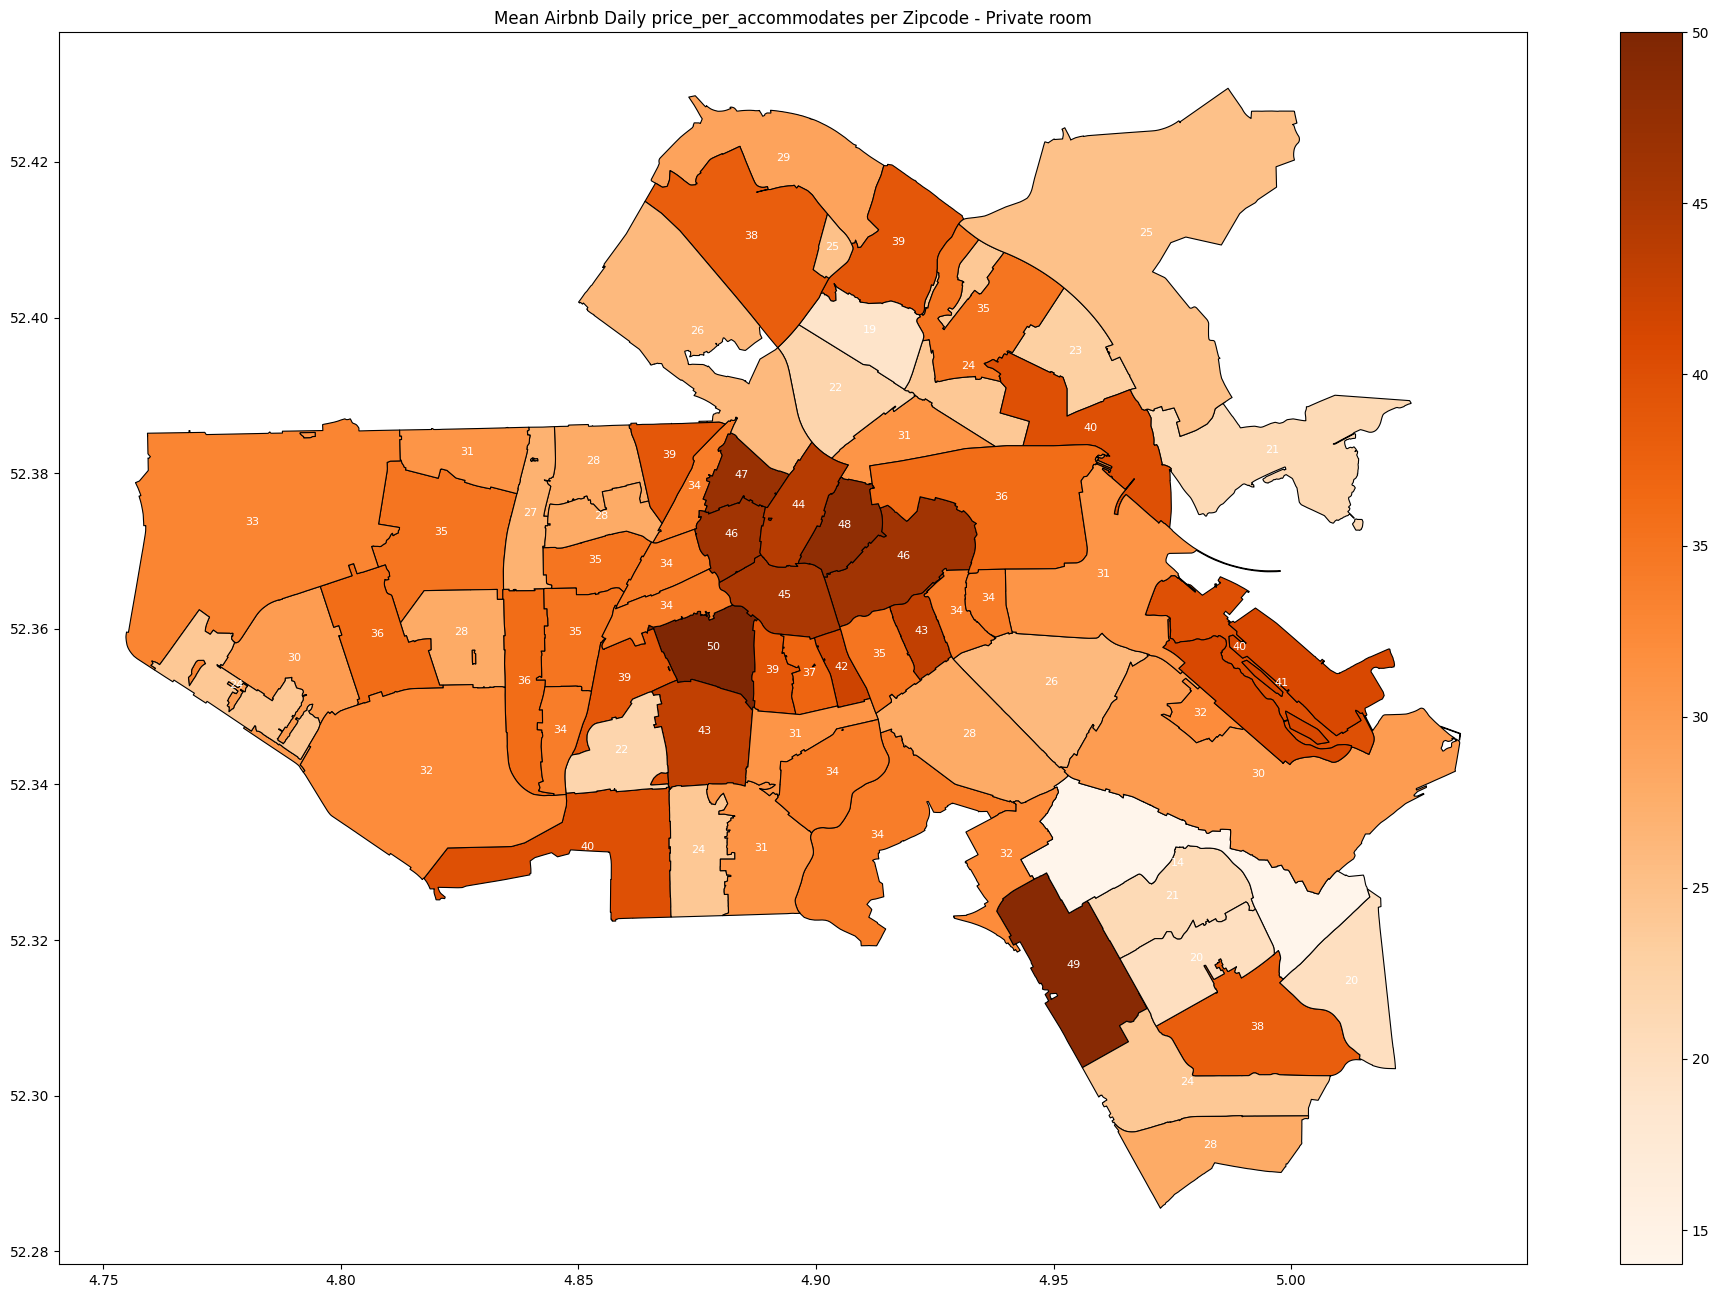

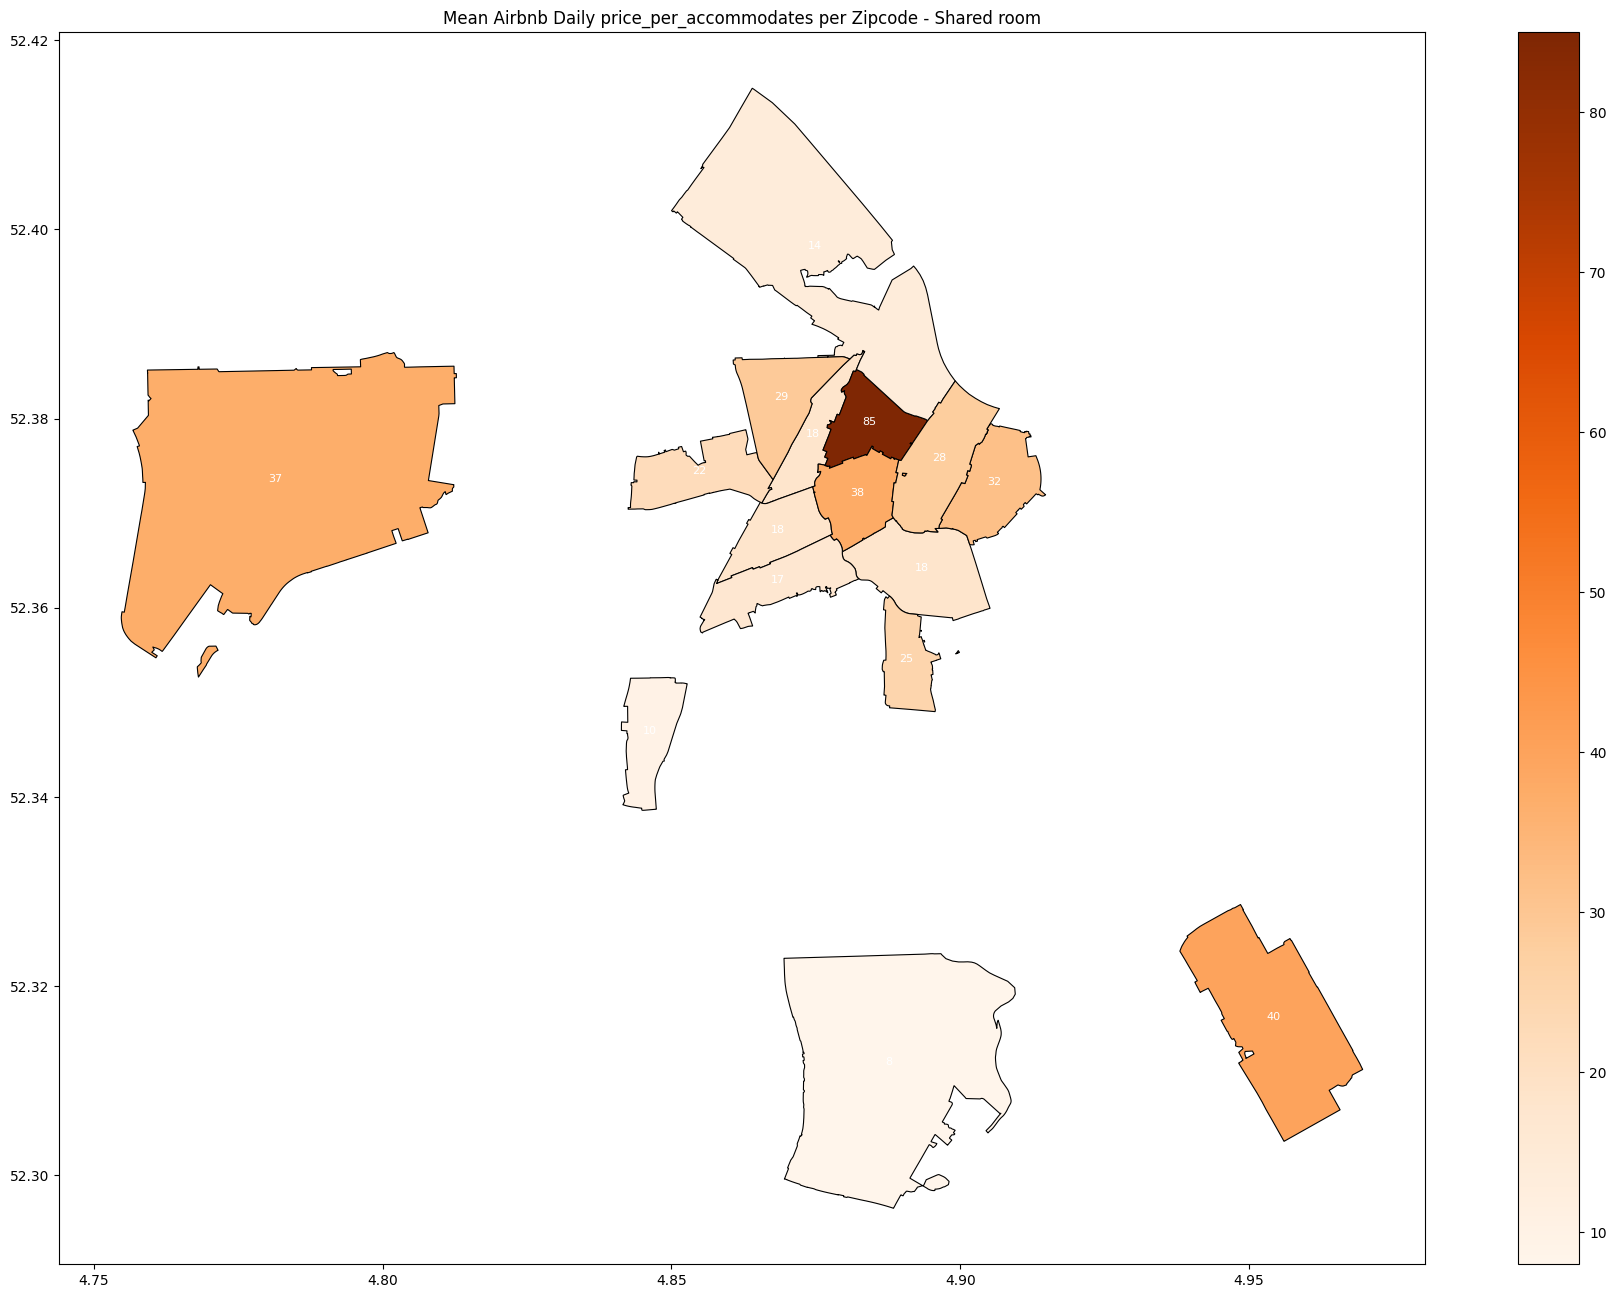

In [16]:
for room_type in room_types:
    target = "price"
    prices = airbnb[airbnb.room_type==room_type].groupby('pc4_code')[target].mean().reset_index() # change here
    amsterdam_map = pd.merge(amsterdam_postcode_map, prices, on='pc4_code', how='inner')
    amsterdam_map[target] = amsterdam_map[target].apply(lambda x: int(round(x)))
    title = f'Mean Airbnb Daily {target} per Zipcode - {room_type}'
    create_amsterdam_heatmap(amsterdam_map, target, title)
    
for room_type in room_types:
    target = "price_per_bedroom"
    prices = airbnb[(airbnb.room_type==room_type)&(airbnb.bedrooms>0)].groupby('pc4_code')[target].mean().reset_index() # change here
    amsterdam_map = pd.merge(amsterdam_postcode_map, prices, on='pc4_code', how='inner')
    amsterdam_map[target] = amsterdam_map[target].apply(lambda x: int(round(x)))
    title = f'Mean Airbnb Daily {target} per Zipcode - {room_type}'
    create_amsterdam_heatmap(amsterdam_map, target, title)
    
for room_type in room_types:
    target = "price_per_accommodates"
    prices = airbnb[(airbnb.room_type==room_type)&(airbnb.accommodates>0)].groupby('pc4_code')[target].mean().reset_index() # change here
    amsterdam_map = pd.merge(amsterdam_postcode_map, prices, on='pc4_code', how='inner')
    amsterdam_map[target] = amsterdam_map[target].apply(lambda x: int(round(x)))
    title = f'Mean Airbnb Daily {target} per Zipcode - {room_type}'
    create_amsterdam_heatmap(amsterdam_map, target, title)

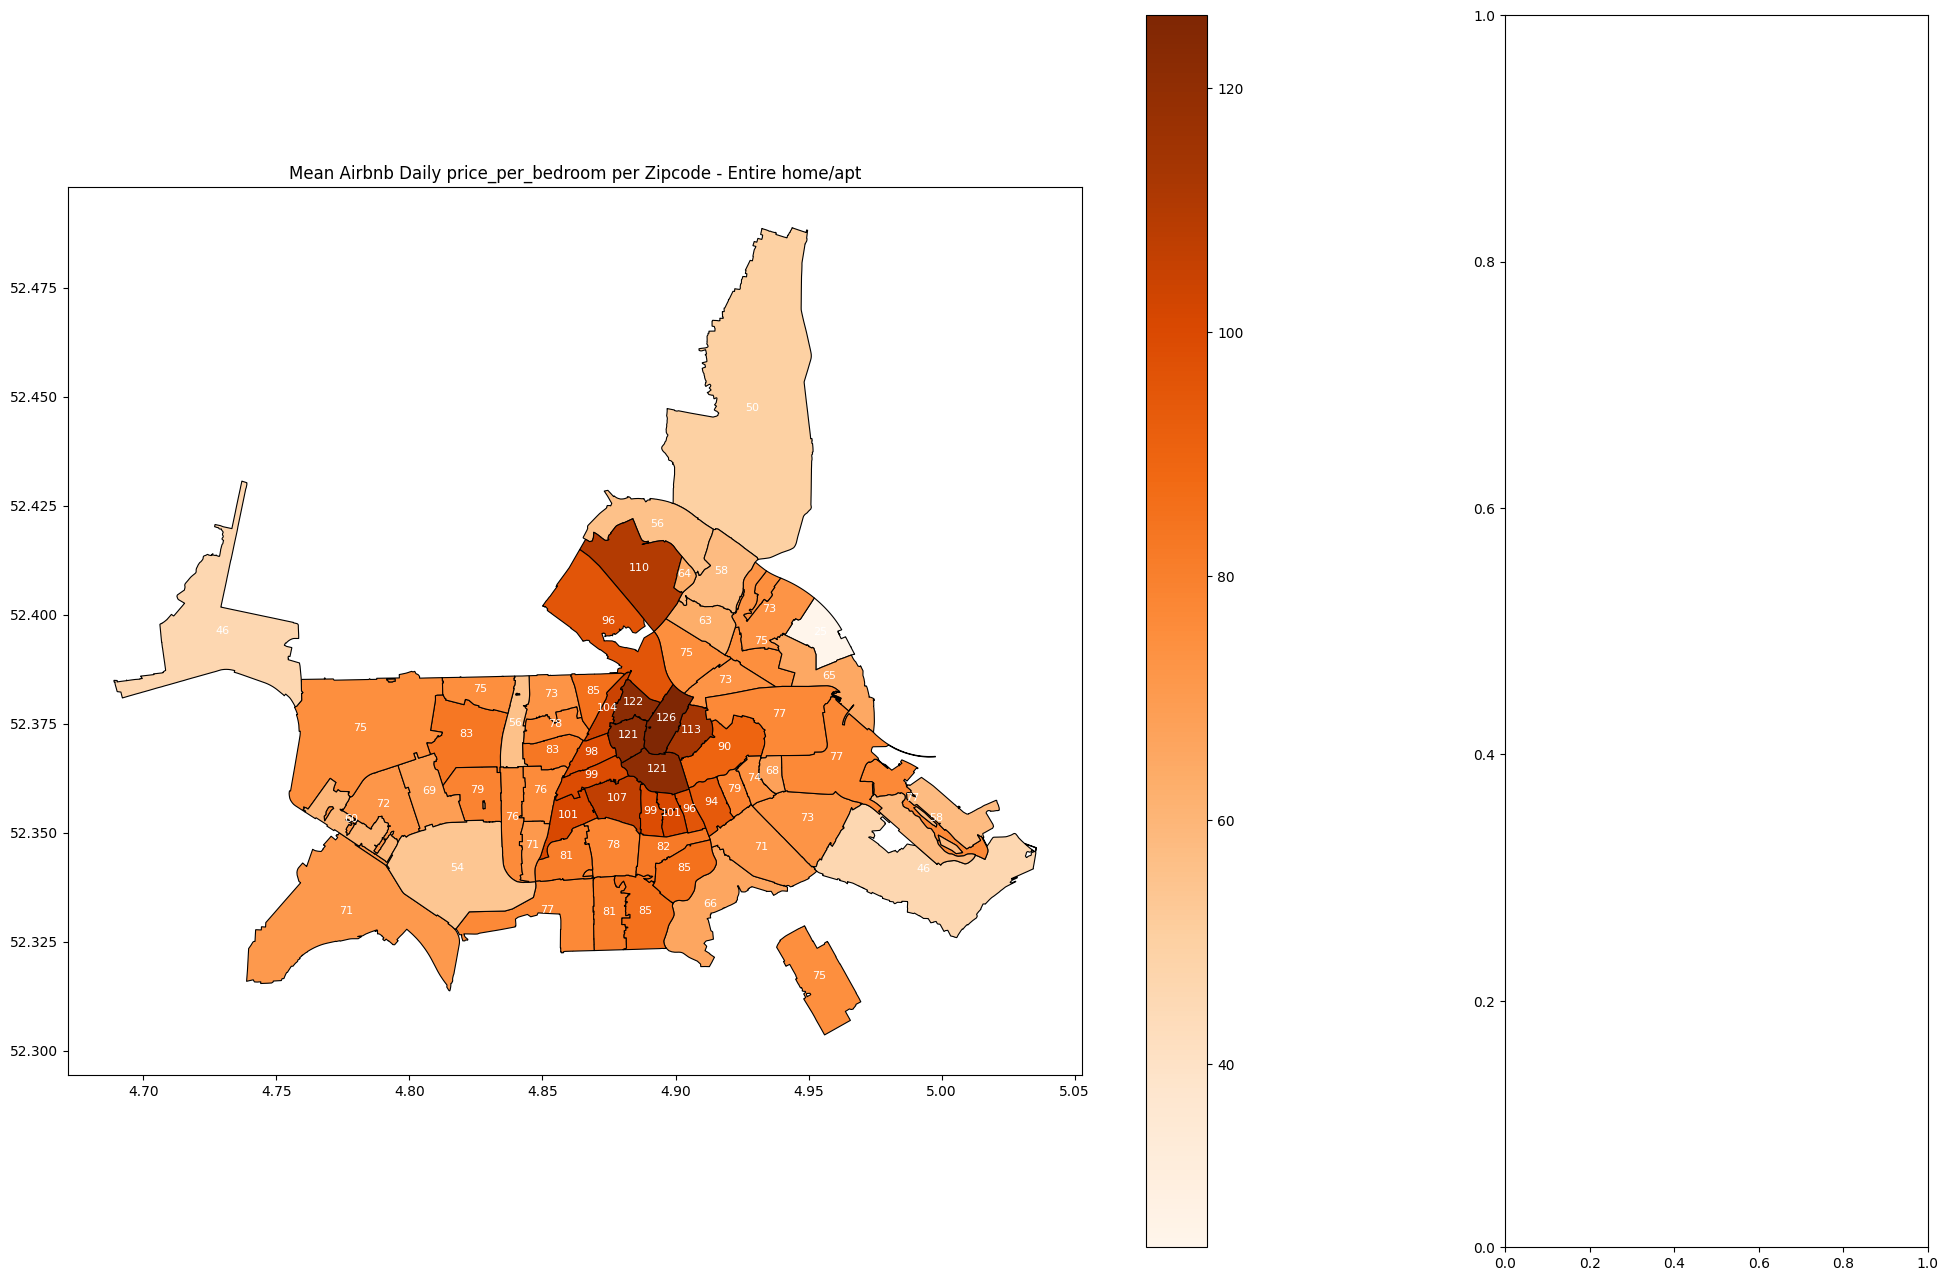

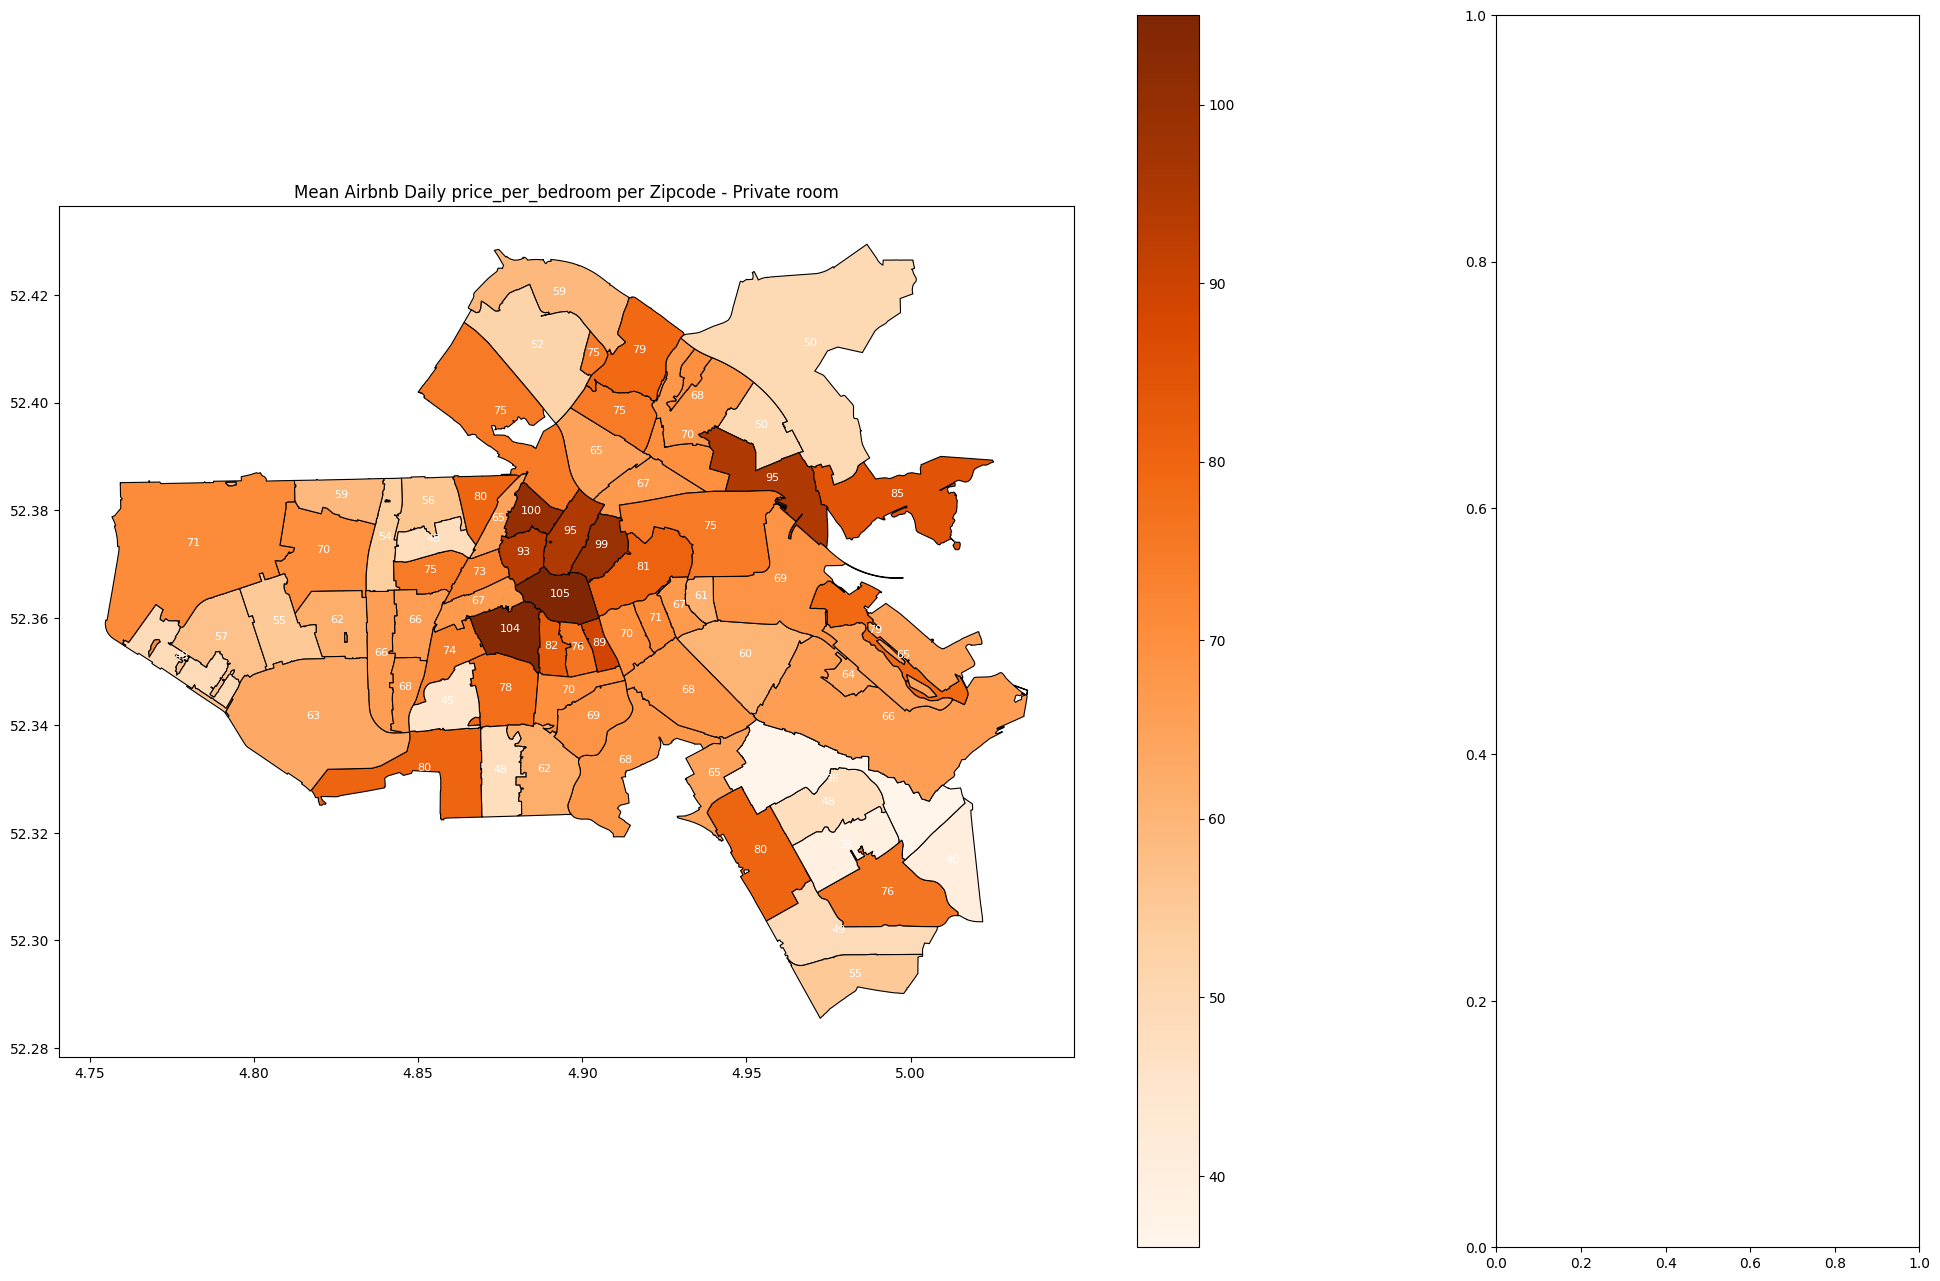

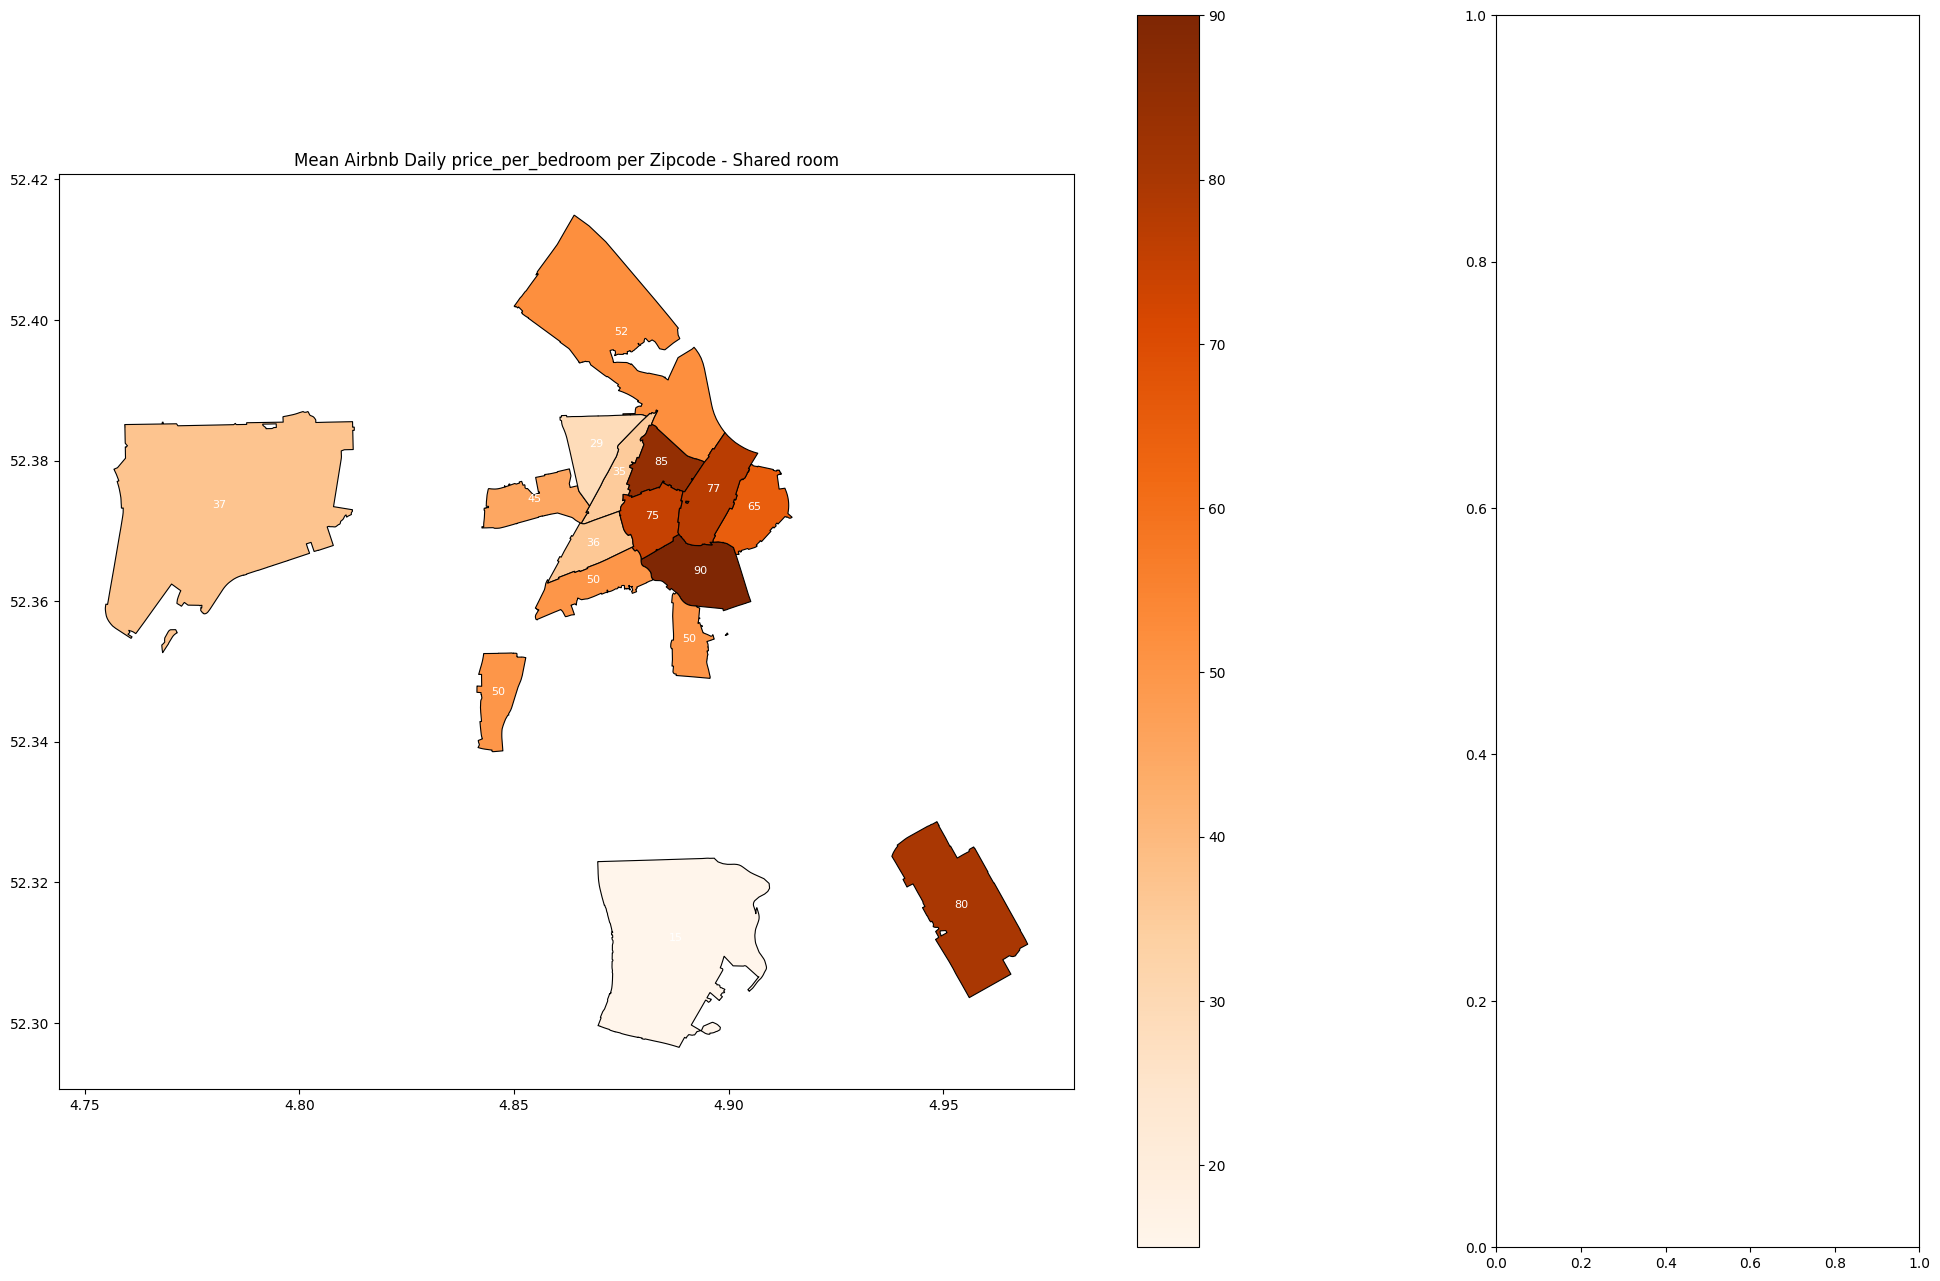

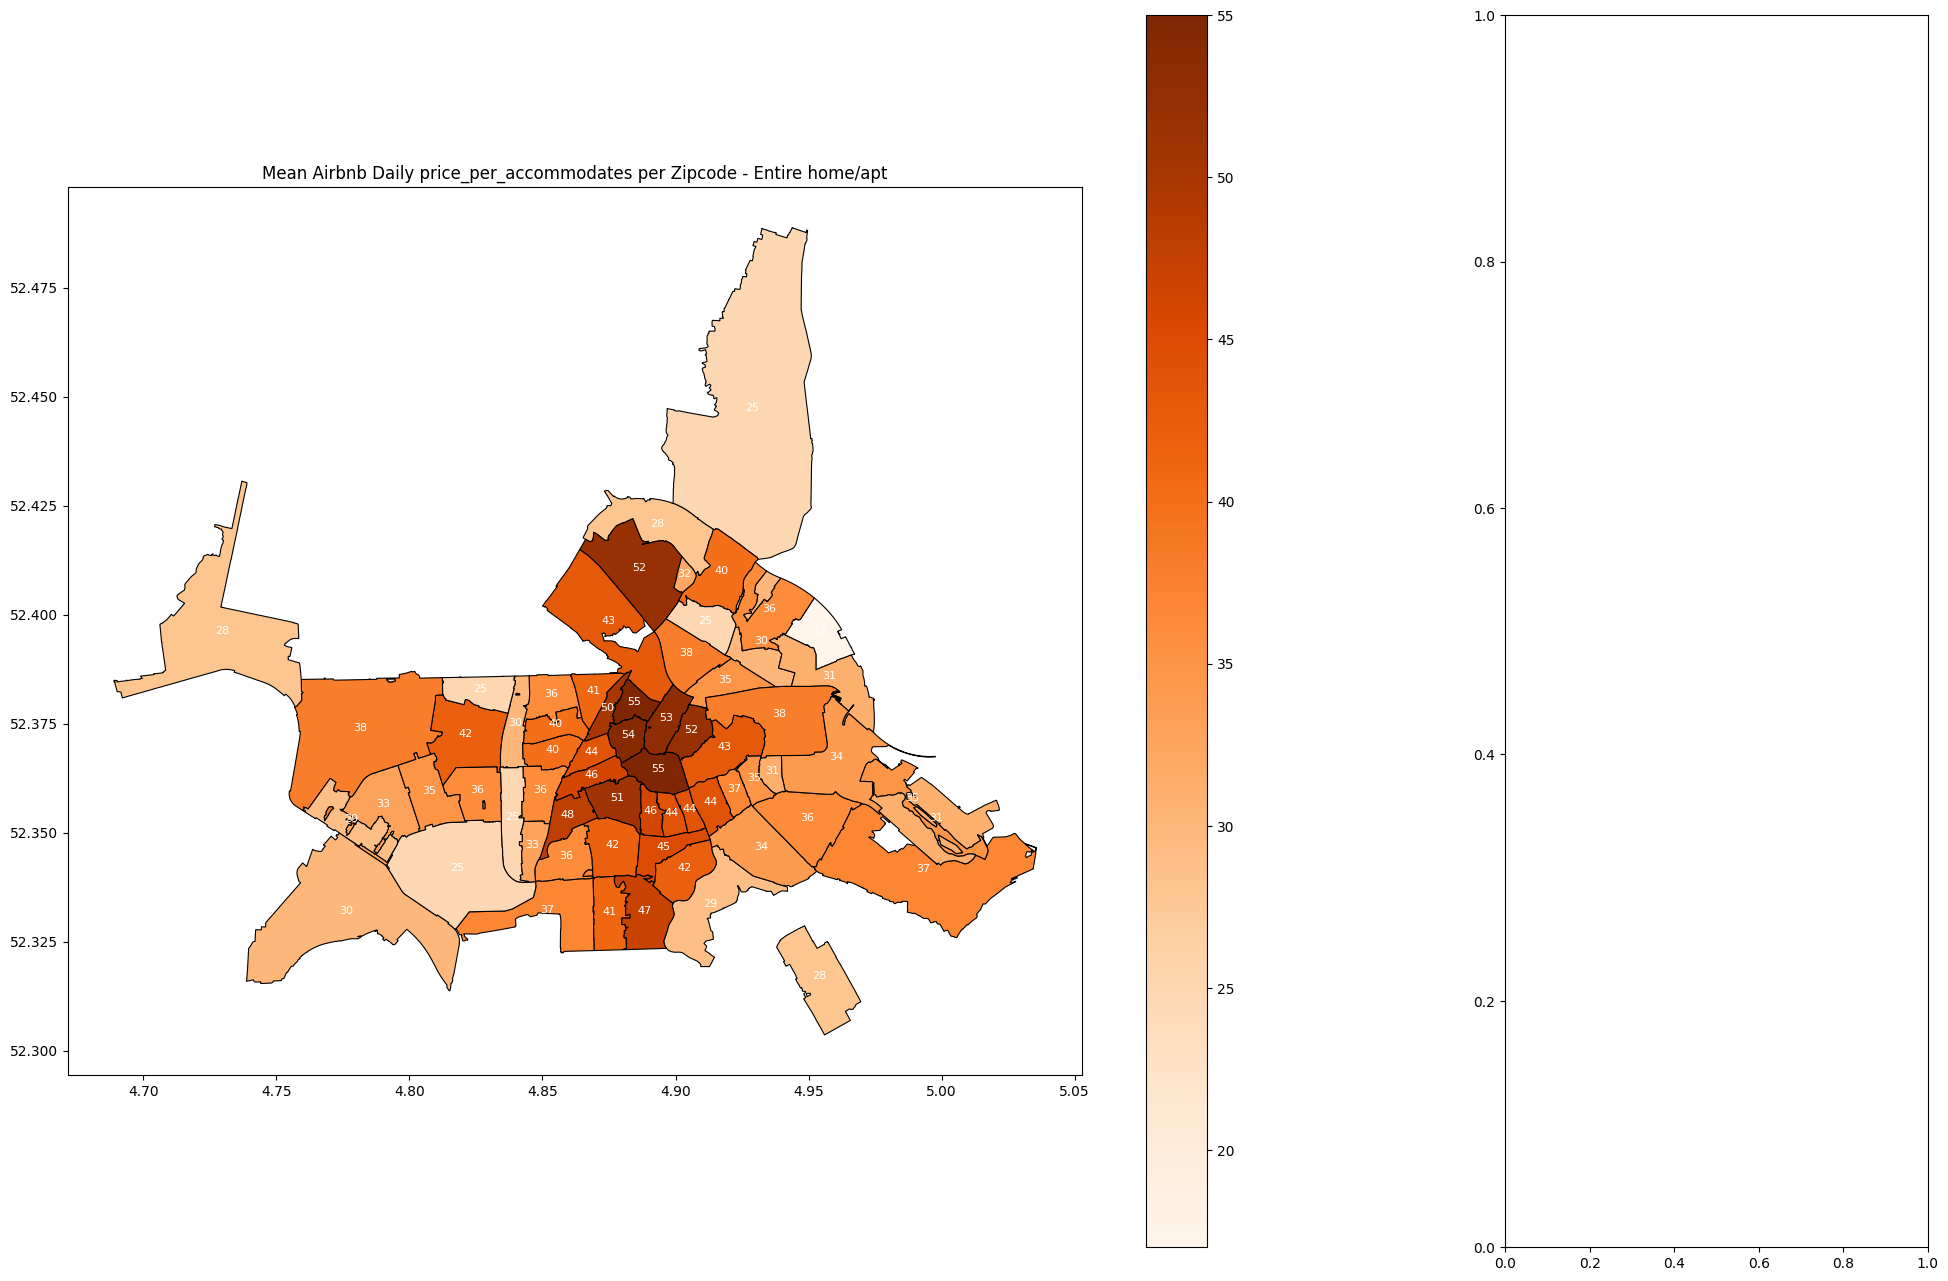

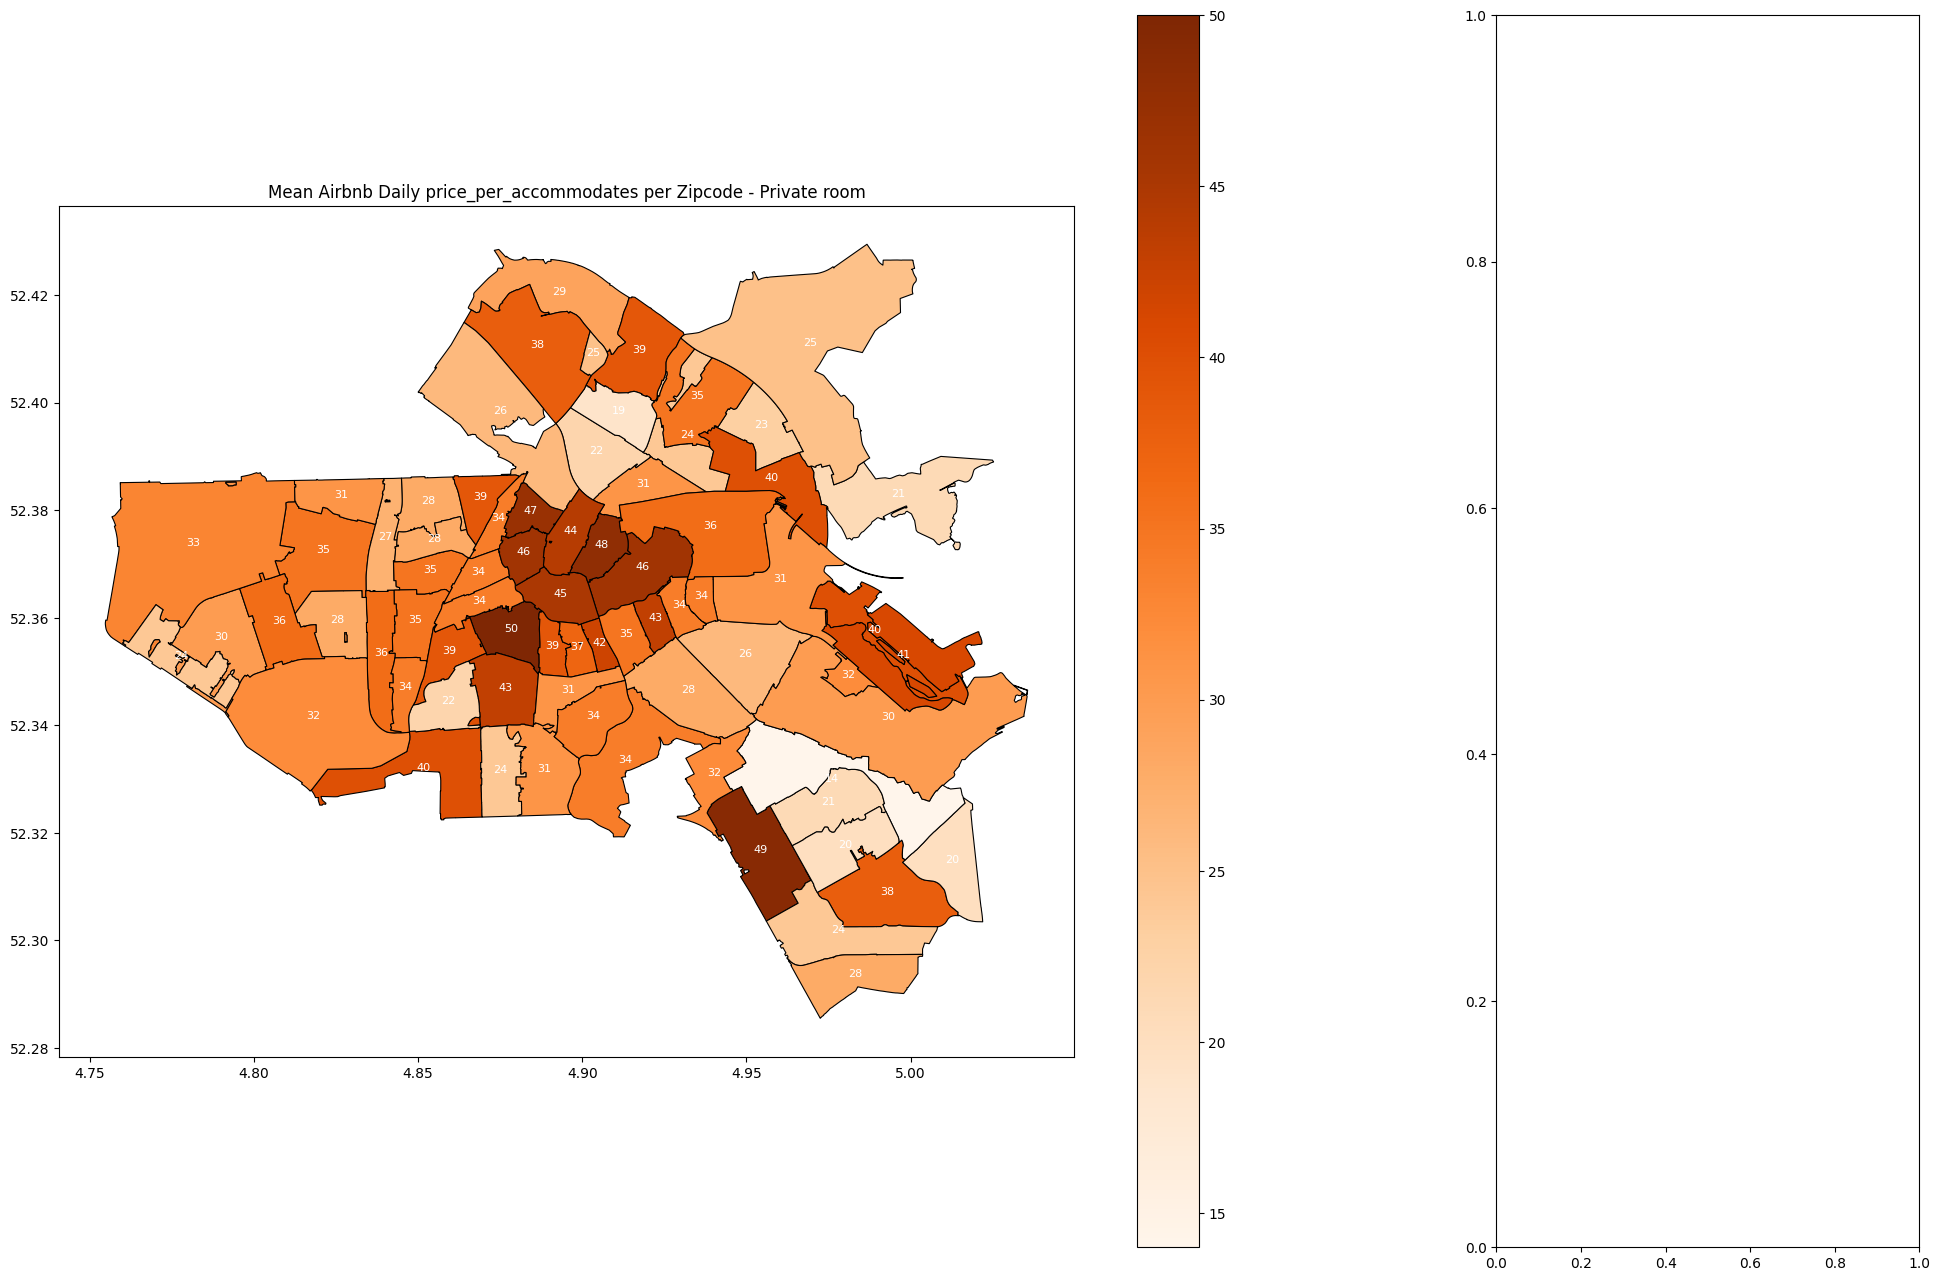

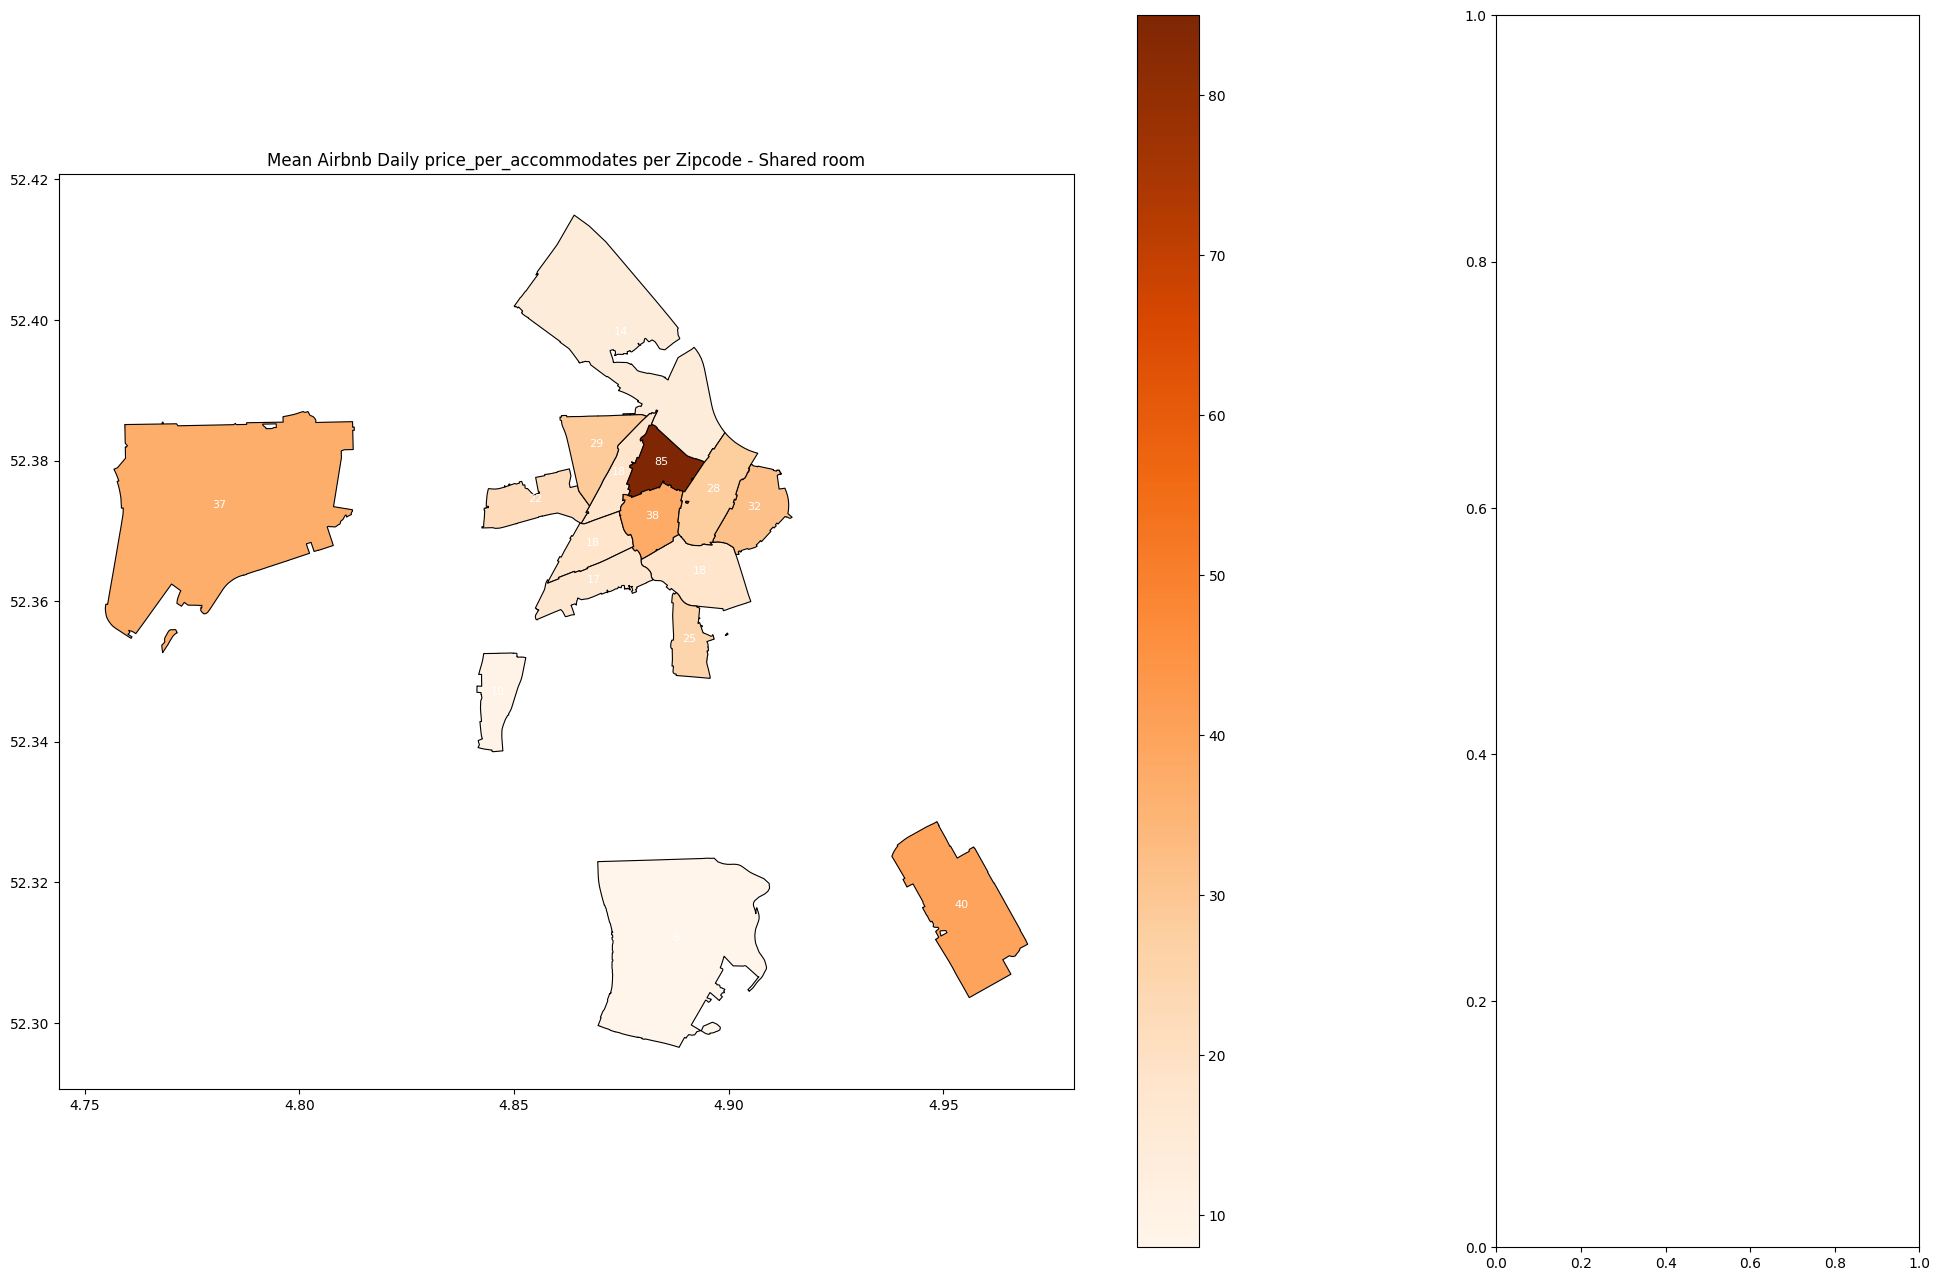